In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('House.csv')

In [5]:
# Check the size and shape of the dataset
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

# Check the data types of each column
data.dtypes

Number of rows: 5000
Number of columns: 6


Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

In [6]:
# Display the first few rows of the dataset
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [7]:
# Compute summary statistics
data.describe()

# Compute the correlation matrix
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

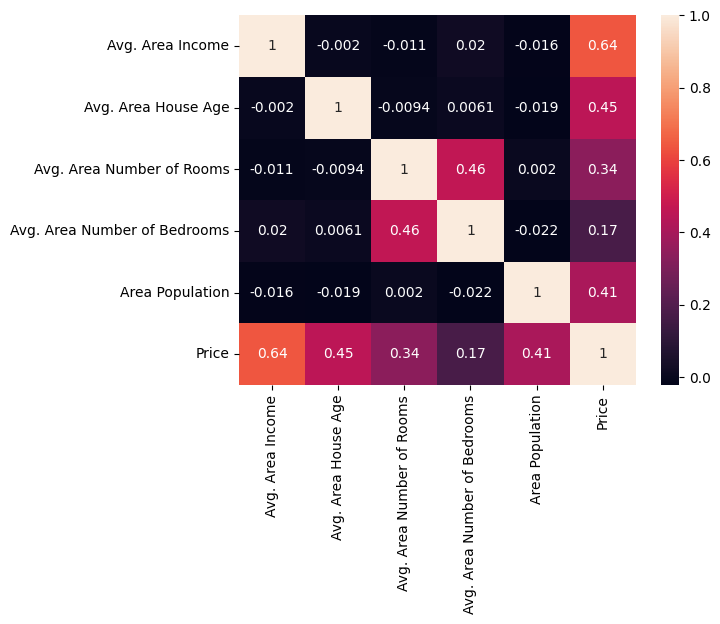

In [8]:
# Heatmap
sns.heatmap(data.corr(), annot=True)

<Axes: xlabel='Avg. Area Income', ylabel='Count'>

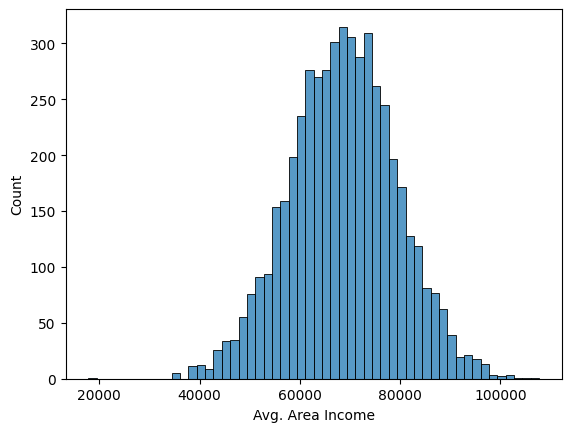

In [9]:
# Histogram
sns.histplot(data['Avg. Area Income'])


<Axes: xlabel='Area Population', ylabel='Avg. Area Income'>

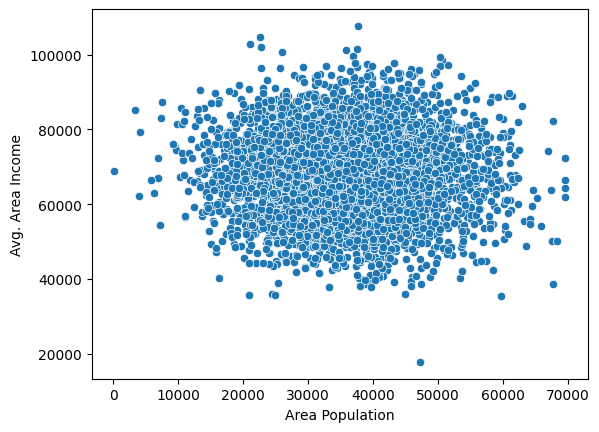

In [10]:
# Scatter plot
sns.scatterplot(x='Area Population', y='Avg. Area Income', data=data)

In [11]:
# Check for missing values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

<Axes: xlabel='Price'>

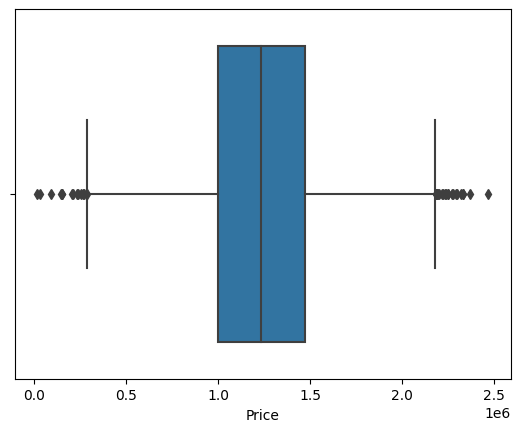

In [12]:
# Identify outliers using boxplot
sns.boxplot(x='Price', data=data)

In [13]:
# Remove outliers using the IQR method
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Price'] >= Q1 - 1.5*IQR) & (data['Price'] <= Q3 + 1.5*IQR)]


In [14]:
print("Number of rows:", data.shape[0])

Number of rows: 4965


<Axes: xlabel='Avg. Area Income'>

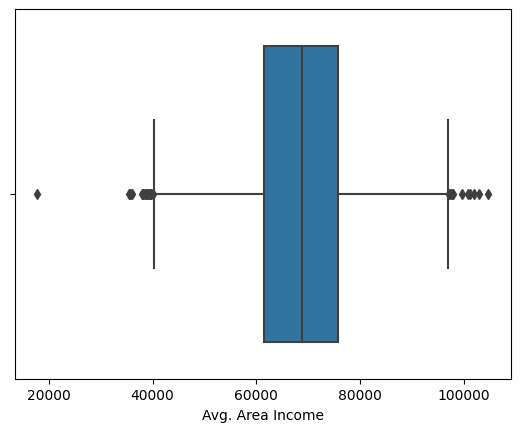

In [15]:
sns.boxplot(x='Avg. Area Income', data=data)

In [16]:
Q1 = data['Avg. Area Income'].quantile(0.25)
Q3 = data['Avg. Area Income'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Avg. Area Income'] >= Q1 - 1.5*IQR) & (data['Avg. Area Income'] <= Q3 + 1.5*IQR)]


In [17]:
print("Number of rows:", data.shape[0])

Number of rows: 4936


<Axes: xlabel='Area Population'>

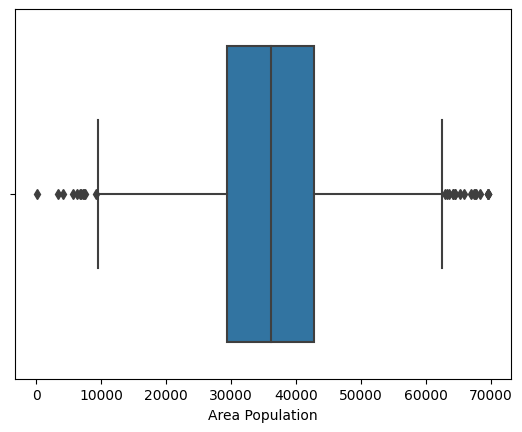

In [18]:
sns.boxplot(x='Area Population', data=data)

In [19]:
Q1 = data['Area Population'].quantile(0.25)
Q3 = data['Area Population'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Area Population'] >= Q1 - 1.5*IQR) & (data['Area Population'] <= Q3 + 1.5*IQR)]


In [20]:
print("Number of rows:", data.shape[0])

Number of rows: 4907


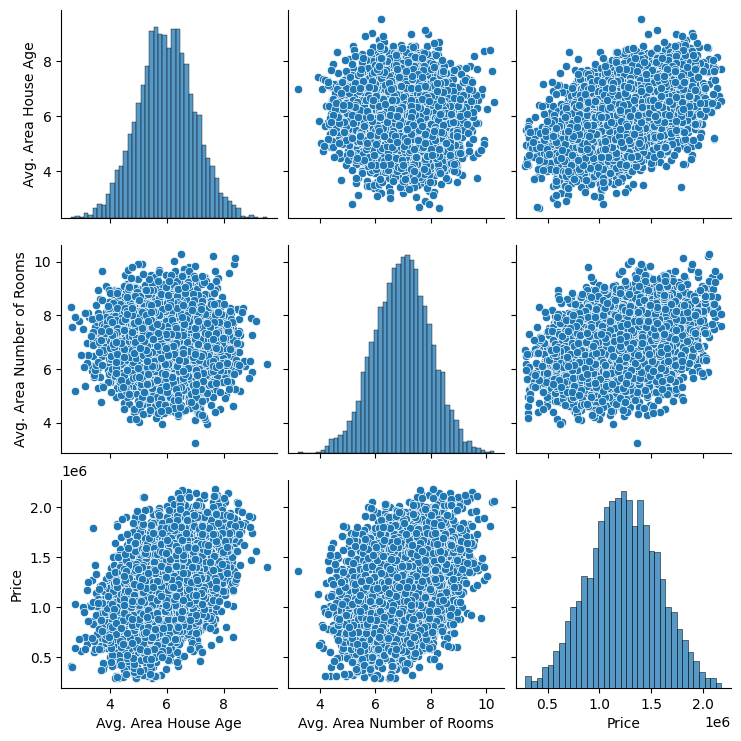

In [21]:
sns.pairplot(data, vars=['Avg. Area House Age', 'Avg. Area Number of Rooms', 'Price'])

In [22]:
import sklearn

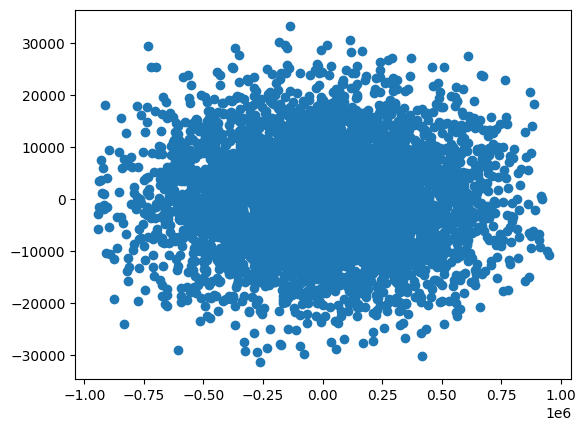

In [23]:
from sklearn.decomposition import PCA

# Initialize PCA with number of components
pca = PCA(n_components=2)

# Fit the PCA model on the data
pca.fit(data)

# Transform the data using the PCA model
data_pca = pca.transform(data)

# Plot the transformed data
plt.scatter(data_pca[:, 0], data_pca[:, 1])

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y = data['Price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("R-squared:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R-squared: 0.9140869002437227
Mean squared error: 10328868118.725132


In [30]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-squared:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R-squared: 0.8803495499913686
Mean squared error: 14384927583.700296


In [36]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R-squared: 0.013229506549267356
Mean squared error: 118634088622.29115
